In [1]:
from study_da.postprocess import aggregate_output_data
from study_da.plot import plot_heatmap, get_title_from_configuration

In [2]:
df_final = aggregate_output_data(
    "example_tune_scan/tree.yaml",
    l_group_by_parameters=["qx_b1", "qy_b1"],
    generation_of_interest=2,
    name_output="output_particles.parquet",    
    write_output=True,
    only_keep_lost_particles=True,
)

In [3]:
df_final

,charge_ratio,_rng_s2,ay,_rng_s3,_rng_s1,s,ax,mass0,particle_id,t_sim,...,Pile-up_ip1_without_beam_beam,Pile-up_ip1_with_beam_beam,Pile-up_ip2_without_beam_beam,Pile-up_ip2_with_beam_beam,Pile-up_ip5_without_beam_beam,Pile-up_ip5_with_beam_beam,Pile-up_ip8_without_beam_beam,Pile-up_ip8_with_beam_beam,beam,delta_max
0,1.0,0,0.0,0,0,24.220600,0.0,9.382721e+08,0.0,0.000089,...,161.334486,175.375439,0.012155,0.006505,161.249498,174.992273,13.837032,13.397735,lhcb1,0.00027
1,1.0,0,0.0,0,0,126.893600,0.0,9.382721e+08,1.0,0.000089,...,160.866459,170.886608,0.012496,0.008552,160.792949,170.504857,13.849816,13.584332,lhcb1,0.00027
2,1.0,0,0.0,0,0,24.220600,0.0,9.382721e+08,1.0,0.000089,...,160.603726,168.142540,0.012689,0.010066,160.541243,167.763758,13.856814,13.684184,lhcb1,0.00027
3,1.0,0,0.0,0,0,24.220600,0.0,9.382721e+08,5.0,0.000089,...,160.443163,166.378166,0.012808,0.011160,160.391447,166.003562,13.861340,13.742825,lhcb1,0.00027
4,1.0,0,0.0,0,0,24.220600,0.0,9.382721e+08,4.0,0.000089,...,160.335976,165.188329,0.012886,0.011955,160.294856,164.818805,13.864394,13.779790,lhcb1,0.00027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0,0,0.0,0,0,126.893600,0.0,9.382721e+08,0.0,0.000089,...,160.865586,171.075215,0.012510,0.008753,161.236433,171.146752,13.864395,13.594494,lhcb1,0.00027
248,1.0,0,0.0,0,0,126.893600,0.0,9.382721e+08,0.0,0.000089,...,160.603021,168.310982,0.012702,0.010305,160.983741,168.375441,13.871419,13.696121,lhcb1,0.00027
249,1.0,0,0.0,0,0,25.049400,0.0,9.382721e+08,0.0,0.000089,...,161.339909,175.627681,0.012170,0.006658,161.726487,175.739167,13.852877,13.405158,lhcb1,0.00027
250,1.0,0,0.0,0,0,128.551200,0.0,9.382721e+08,0.0,0.000089,...,160.866140,171.087086,0.012511,0.008764,161.262377,171.184399,13.865207,13.595051,lhcb1,0.00027


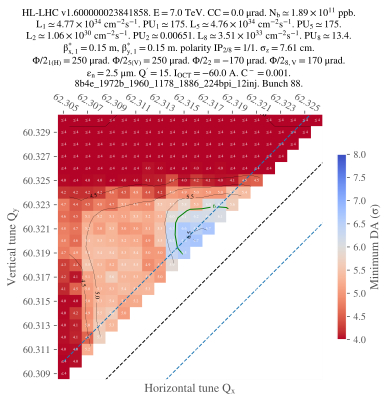

In [7]:
title = get_title_from_configuration(
    df_final,
    betx_value=0.15,
    bety_value=0.15,
    display_LHC_version=True,
    display_energy=True,
    display_bunch_index=True,
    display_CC_crossing=True,
    display_bunch_intensity=True,
    display_beta=True,
    display_crossing_IP_1=True,
    display_crossing_IP_2=True,
    display_crossing_IP_5=True,
    display_crossing_IP_8=True,
    display_bunch_length=True,
    display_polarity_IP_2_8=True,
    display_emittance=True,
    display_chromaticity=True,
    display_octupole_intensity=True,
    display_coupling=True,
    display_filling_scheme=True,
    display_tune=False,
    display_luminosity_1=True,
    display_luminosity_2=True,
    display_luminosity_5=True,
    display_luminosity_8=True,
    display_PU_1=True,
    display_PU_2=True,
    display_PU_5=True,
    display_PU_8=True,
)

fig, ax = plot_heatmap(
    df_final,
    horizontal_variable="qx_b1",
    vertical_variable="qy_b1",
    color_variable="normalized amplitude in xy-plane",
    plot_contours=True,
    xlabel=r"Horizontal tune $Q_x$",
    ylabel=r"Vertical tune $Q_y$",
    symmetric_missing=True,
    mask_lower_triangle=True,
    title=title,
    vmin=4,
    vmax=8,
    green_contour=6.0,
    label_cbar="Minimum DA (" + r"$\sigma$" + ")",
    output_path="output.pdf",
    vectorize=True,
    fill_missing_value_with="interpolate",
)